In [149]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    HuberRegressor,
    LinearRegression,
    RANSACRegressor,
    TheilSenRegressor,
)
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)

from sklearn import datasets
from sklearn import svm

from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import KFold

In [151]:
df = pd.read_csv("./datasets/data1.csv", sep=",")

In [152]:
df.head()

,x1,x2,x3,y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [153]:
def data_prepare(df_X, df_y):
    min_max_scaler = preprocessing.MinMaxScaler()
    
    X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=0)
    
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.fit_transform(X_test)

    Y_train = min_max_scaler.fit_transform(Y_train)
    Y_test = min_max_scaler.fit_transform(Y_test)

    return (X_train, X_test, Y_train, Y_test)

In [154]:
X_train, X_test, y_train, y_test = data_prepare(df[["x3"]], df[["y"]])
X_train.shape, y_train.shape


((70, 1), (70, 1))

In [155]:
def ker(x,𝜇,𝜎):
    return np.exp((-((x-𝜇)**2))/(2*𝜎**2))

data_task3 = df.drop('y',axis=1)

for i in range(len(data_task3)):
    𝜇 = np.random.uniform(-1,1,data_task3.iloc[i].shape)
    data_task3.iloc[i] = ker(data_task3.iloc[i], 𝜇, abs(𝜇[len(𝜇)-1] - 𝜇[int((len(𝜇)-1)/2)] ))

data_task3.head()

df["x4"] = data_task3["x1"]
df["x5"] = data_task3["x2"]
df["x6"] = data_task3["x3"]


In [156]:
df.head()

,x1,x2,x3,y,x4,x5,x6
0,0.000000,3.440000,0.440000,4.387545,8.483064e-01,4.864247e-08,0.998498
1,0.040404,0.134949,0.888485,2.679650,0.000000e+00,0.000000e+00,0.000000
2,0.080808,0.829899,1.336970,2.968490,1.909820e-01,9.832130e-01,0.101173
3,0.121212,1.524848,1.785455,3.254065,9.880075e-01,4.250279e-01,0.905575
4,0.161616,2.219798,2.233939,3.536375,1.709982e-15,0.000000e+00,0.000000


# 1. За весь пункт 4 балла. Рассмотрим первый датасет. Пусть $x_i$ столбец данных, $y=x_4$
### a. Обучите линейную регрессию. Предскажите значения для $x=1,2,3$

In [157]:
plt.rcParams['figure.figsize'] = (16, 4)

Score 0 :  0.02379728108624502
Score 1 :  0.08538226121654784
Score 2 :  0.08689910447788356
Score 3 :  0.020269341964292118
Score 4 :  0.060789520053270554


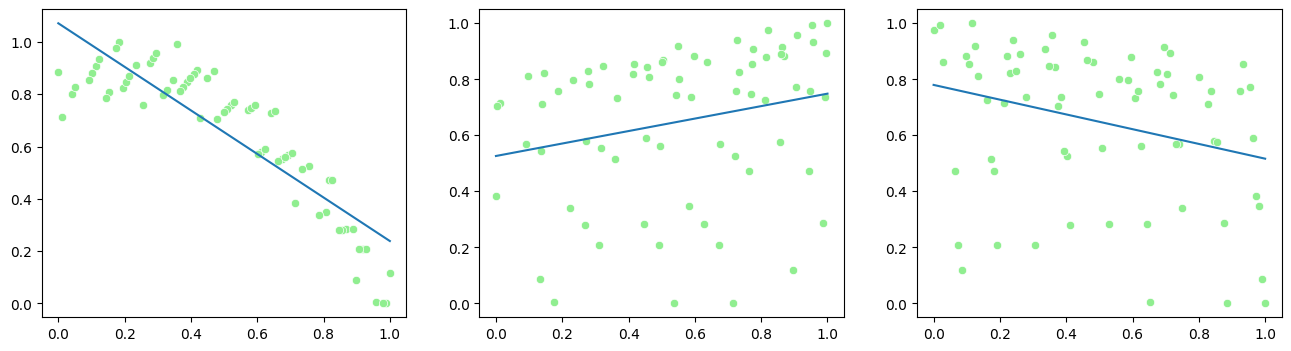

In [158]:
lm = LinearRegression()

features = [["x1"], ["x2"], ["x3"], ["x1", "x2", "x3"], ["x4", "x5", "x6"]]

fig, axs = plt.subplots(1, 3)
#fig.set_figwidth(16)

for i in range(len(features)):

    X_train, X_test, y_train, y_test = data_prepare(df[features[i]], df[["y"]])

    lm.fit(X_train, y_train)
    preds = lm.predict(X_test)
    print("Score", i,": ", mean_squared_error(preds, y_test))

    if (i >= 3):
        continue
    sns.scatterplot(ax=axs[i], x=X_train.reshape(-1), y=y_train.reshape(-1), color="lightgreen")
    sns.lineplot(ax=axs[i], x=X_test.reshape(-1), y=preds.reshape(-1))

### b. Используя кросс-валидацию и среднеквадратичную функцию потерь, оцените точность и способность к генерализации у модели

In [159]:
for i in range(len(features)):
    X_train, X_test, y_train, y_test = data_prepare(df[features[i]], df[["y"]])

    scoring = {'mse': make_scorer(mean_squared_error)}
    scores = cross_validate(lm, X_train, y_train, scoring=scoring, cv=5) #'mean_squared_error'
    print("Score", i,": ", scores["test_mse"])

Score 0 :  [0.02112936 0.02171493 0.00997011 0.02067251 0.02036068]
Score 1 :  [0.03591424 0.06241233 0.06117688 0.11877113 0.09190103]
Score 2 :  [0.04977407 0.06832801 0.07169013 0.10783807 0.08221119]
Score 3 :  [0.01560564 0.02603492 0.00699356 0.02032491 0.01714385]
Score 4 :  [0.02967426 0.06629278 0.04365125 0.09767082 0.0749512 ]


In [160]:
df_y = pd.DataFrame(np.append(y_train, y_test))
df_y.describe()

,0
count,100.000000
mean,0.660546
std,0.277574
min,0.000000
25%,0.503970
50%,0.765033
75%,0.861140
max,1.000000


В зависимости от признака наблюдается разная среднеквадратическая ошибка, что связанно с разной дисперсией в данных, что наглядно видно по графикам. Модель неплохо обучилась на "x1", "x2" и "x3", хотя "x1" - нелинеен, "x2" и "x3" имеет выбросы, из-за которых страдает среднеквадратическая оценка.  

### c. Обучите полиномиальную регрессию, для кросс-валидации постройте график bias, variance в зависимости от степени полинома. Какая степень оптимальна?

In [161]:
def train_polynomial_regression(X, y, degree):
    X_train, X_test, y_train, y_test = data_prepare(X, y)

    # Добавление новых признаков:  [a, b] --(2)--> [1, a, b, a^2, ab, b^2].
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)    
    X_poly_test = poly_features.fit_transform(X_test)    
    
    #scoring = {'mse': make_scorer(mean_squared_error)}
    #scores = cross_validate(lm, X_poly_train, y_train, scoring=scoring, cv=5) #'mean_squared_error'
    #bias = np.mean(scores["test_mse"])
    #var = np.var(scores["test_mse"])

    mse, bias, var = bias_variance_decomp(
        lm, X_poly_train, y_train[:,0], X_poly_test, y_test[:,0], loss='mse', num_rounds=100 #, random_seed=25
    )

    return (bias,var)

In [162]:
My_array = np.arange(len(features)*8*2).reshape((len(features), 8, 2)).astype(np.float32)

for i in range(len(features)):
    for degree in [1, 2, 3, 4, 5, 6, 7, 8]:
        bias,var = train_polynomial_regression(df[features[i]], df[["y"]], degree=degree)

        My_array[i, degree-1, 0] = bias
        My_array[i, degree-1, 1] = var

In [163]:
My_arr2 = My_array.transpose(2, 0, 1)
biases = My_arr2[0]
vars = My_arr2[1]

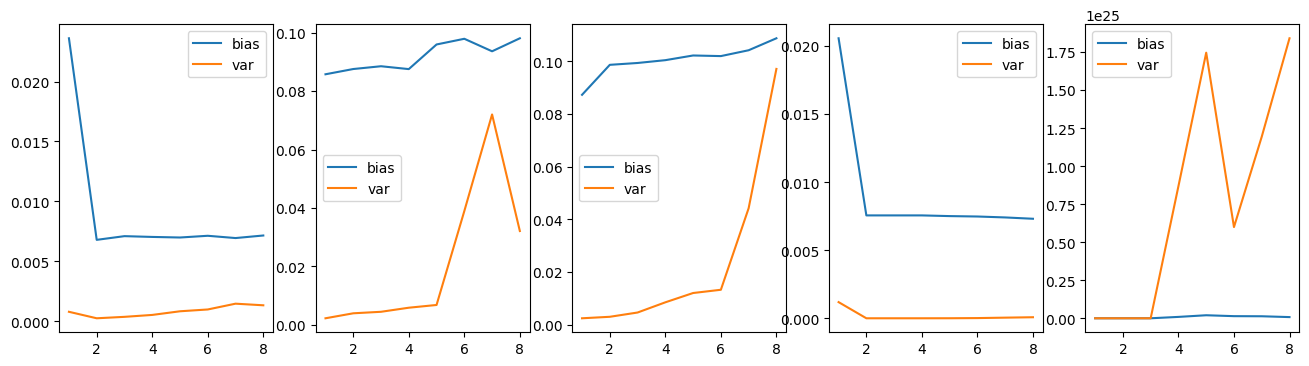

In [164]:
fig, axs = plt.subplots(1, len(features))


for i in range(len(features)):
    sns.lineplot(ax=axs[i],x=range(1, len(biases[i])+1), y=biases[i],label="bias")
    sns.lineplot(ax=axs[i],x=range(1, len(vars[i])+1), y=vars[i],label="var")
    plt.plot()


https://education.yandex.ru/handbook/ml/article/bias-variance-decomposition
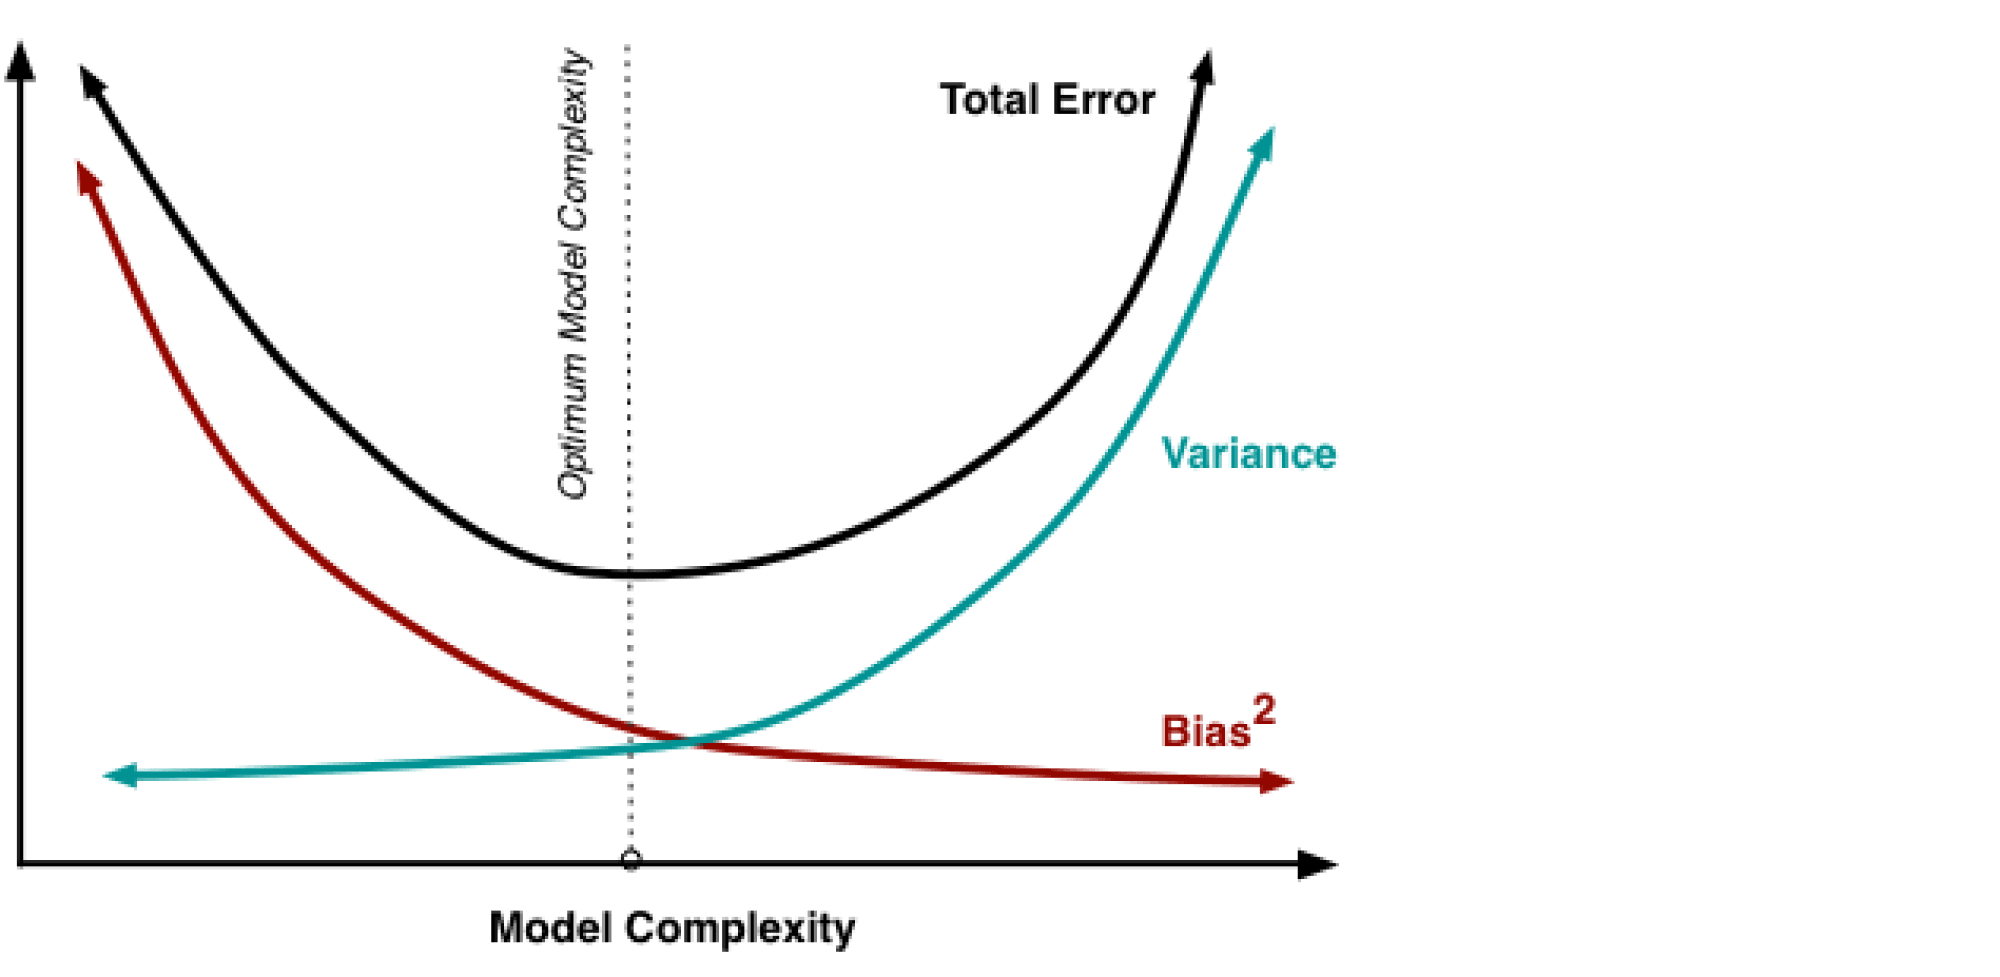

### d. Проведите подбор степени полинома с помощью любого из k-fold на 70% данных. Совпадают ли результаты? Оцените точность модели на оставшихся 30%.

In [165]:
for i in range(len(features)):
    X_train, X_test, y_train, y_test = data_prepare(df[features[i]], df[["y"]])

    kfld = KFold(n_splits=4)
    train_index, test_index = next(kfld.split(X_train, y_train))
    
    X_fold_train = X_train[train_index]
    y_fold_train = y_train[train_index]
    X_fold_test  = X_train[test_index]
    y_fold_test  = y_train[test_index]

    min_score = 9999
    best_degree = 0

    for degree_par in range(1, 5):
        X_poly_fold_train = PolynomialFeatures(degree_par).fit_transform(X_fold_train)
        X_poly_fold_test  = PolynomialFeatures(degree_par).fit_transform(X_fold_test)

        lm.fit(X_poly_fold_train, y_fold_train)
        lm_pred = lm.predict(X_poly_fold_test)
        score = mean_squared_error(lm_pred, y_fold_test)
        
        if score <= min_score:
            min_score = score
            best_degree = degree_par
    
    print("Degree: ", best_degree,  "; best_mse:", min_score)



Degree:  2 ; best_mse: 0.005652283295768142
Degree:  2 ; best_mse: 0.038782492765669196
Degree:  4 ; best_mse: 0.05124575628477369
Degree:  3 ; best_mse: 1.1247430875221457e-31
Degree:  1 ; best_mse: 0.03320415569030977


In [166]:
degree = [2, 2, 4, 3, 1]

for i in range(len(features)):
    X_train, X_test, y_train, y_test = data_prepare(df[features[i]], df[["y"]])

    kfld = KFold(n_splits=4)
    train_index, test_index = next(kfld.split(X_test, y_test))
    
    X_fold_train = X_train[train_index]
    y_fold_train = y_train[train_index]
    X_fold_test  = X_train[test_index]
    y_fold_test  = y_train[test_index]

    X_poly_fold_train = PolynomialFeatures(degree[i]).fit_transform(X_fold_train)
    X_poly_fold_test  = PolynomialFeatures(degree[i]).fit_transform(X_fold_test)

    lm.fit(X_poly_fold_train, y_fold_train)
    lm_pred = lm.predict(X_poly_fold_test)
    score = mean_squared_error(lm_pred, y_fold_test)

    lm.fit(X_poly_fold_train, y_fold_train)
    lm_pred = lm.predict(X_poly_fold_test)
    score = mean_squared_error(lm_pred, y_fold_test)
        
    print("Degree: ", degree[i],  "; best_mse:", score)

Degree:  2 ; best_mse: 0.0037681927128535037
Degree:  2 ; best_mse: 0.053399364614640815
Degree:  4 ; best_mse: 0.0745641152020525
Degree:  3 ; best_mse: 1.1389949691106113e-30
Degree:  1 ; best_mse: 0.06164172900934383
